In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data 
dataset = pd.read_csv("train.csv", index_col=0) 
X, y = dataset.iloc[:, :-2], dataset.iloc[:, -2:]

# Splitting 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 123)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(train_X)
X_testscaled=sc_X.transform(test_X)

In [3]:
reg = MLPRegressor(hidden_layer_sizes=(8,8,8),activation="relu" ,random_state=123, max_iter=20000).fit(X_trainscaled, train_y)

In [4]:
pred=reg.predict(X_testscaled)
rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse))

RMSE :  0.463646


In [11]:
pred=reg.predict(X_testscaled)
rmseq = np.sqrt(MSE(test_y.Quality, pred[:,0])) 
rmsec = np.sqrt(MSE(test_y.Cost, pred[:,1])) 
print("RMSE for Quality : % f" %(rmseq))
print("RMSE for Cost : % f" %(rmsec))

RMSE for Quality :  0.269157
RMSE for Cost :  0.597905


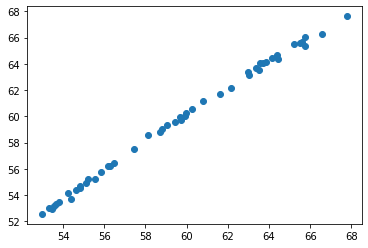

In [12]:
plt.scatter(pred[:,0], test_y.Quality)

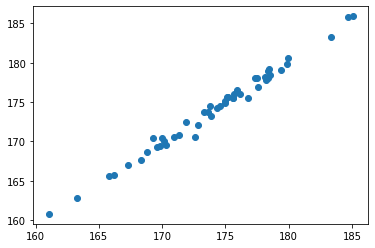

In [13]:
plt.scatter(pred[:,1], test_y.Cost)

In [18]:
X.head()

T          v          A         B          C
0  121.215588  22.967153  35.217683  7.089917  19.583351
1  121.996775  22.891951  33.428611  9.257207  19.561464
2  121.067478  22.581532  34.212624  8.879500  18.654764
3  121.162223  22.728295  34.398752  7.258198  18.676195
4  121.356355  22.574646  32.796329  7.722552  20.844634

In [17]:
test_X = pd.read_csv("test.csv", index_col=0)
test_X.head()

T          v          A         B          C
161  120.281533  22.331973  32.799262  7.162390  20.259448
162  120.481853  22.993312  34.822640  8.175152  21.265842
163  119.942013  22.031269  34.274216  6.947022  19.616673
164  122.904854  22.356294  34.382638  8.161419  20.708785
165  121.050100  22.135770  33.949126  9.130500  21.365376

In [22]:
y.head()

Quality        Cost
0  55.241732  170.785189
1  67.461281  184.298627
2  65.822762  175.334769
3  56.811388  167.085599
4  59.002705  176.853858

In [19]:
X_trainscaled=sc_X.fit_transform(X)
X_testscaled=sc_X.transform(test_X)

In [23]:
final = MLPRegressor(hidden_layer_sizes=(8,8,8),activation="relu" ,random_state=123, max_iter=20000).fit(X_trainscaled, y)

In [27]:
pred=reg.predict(X_testscaled)

In [36]:
out = pd.DataFrame(data=pred, index=np.arange(161, 161+89), columns=["Quality", "Cost"])

In [37]:
out

Quality        Cost
161  56.260437  171.151432
162  60.839841  183.788874
163  55.316316  164.626827
164  62.986706  181.060614
165  66.872988  184.559908
..         ...         ...
245  63.658375  175.694898
246  56.992825  170.063220
247  70.287735  185.664887
248  63.688782  175.632346
249  62.482071  181.963018

[89 rows x 2 columns]

In [35]:
out.to_csv("wearevikings_Q2.csv")

In [ ]:
# Necessary imports 
import xgboost as xg 

# Load the data 
dataset = pd.read_csv("train.csv", index_col=0) 
X, y1, y2 = dataset.iloc[:, :-2], dataset.iloc[:, -2], dataset.iloc[:, -1]  

# Splitting 
train_X, test_X, train_y1, test_y1, train_y2, test_y2 = train_test_split(X, y1, y2, test_size = 0.3, random_state = 123)


# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train1_dmatrix = xg.DMatrix(data = train_X.values, label = train_y1.values) 
test1_dmatrix = xg.DMatrix(data = test_X.values, label = test_y1.values) 
train2_dmatrix = xg.DMatrix(data = train_X.values, label = train_y2.values) 
test2_dmatrix = xg.DMatrix(data = test_X.values, label = test_y2.values) 


# Parameter dictionary specifying base learner 
param = {"booster":"gbtree", "objective":"reg:squarederror"} 

xgb_r = xg.train(params = param, dtrain = train1_dmatrix, num_boost_round = 10) 

# RMSE Computation 
pred1 = xgb_r.predict(test1_dmatrix) 
rmse = np.sqrt(MSE(test_y1, pred1)) 
print("RMSE Quality: % f" %(rmse)) 


# Parameter dictionary specifying base learner 
param = {"booster":"gbtree", "objective":"reg:squarederror"} 

xgb_r = xg.train(params = param, dtrain = train2_dmatrix, num_boost_round = 10) 

# RMSE Computation 
pred2 = xgb_r.predict(test2_dmatrix) 
rmse = np.sqrt(MSE(test_y2, pred2)) 
print("RMSE Cost: % f" %(rmse)) 

RMSE Quality:  1.738966
RMSE Cost:  5.870827


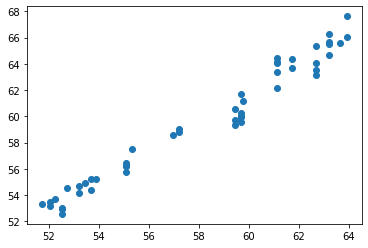

In [ ]:
plt.scatter(pred1, test_y1)

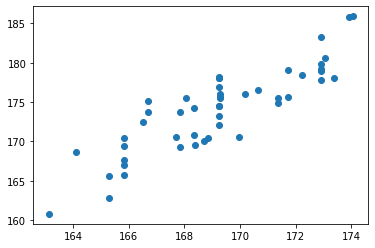

In [ ]:
plt.scatter(pred2, test_y2)